# Simple Plot Example

## Simple Task

You get three signal with a sinusoidal shape. The signal is defined as:

$$
f(t) = A \cdot \sin\left(2 \pi \cdot f \cdot t + \phi_0 \right)
$$

where:
- $A$ is the amplitude of the function
- $f$ is the frequency of the function
- $\phi_0$ is the phase of the function
- $t$ is the time

You need to plot the signal for three different values of $A$ and $P$.
Make the plot as beautiful as possible.
Think about the colors, the labels, the title, the grid, etc.
Make sure that the plot is easy to read and understand and ready for publication.
Have fun!



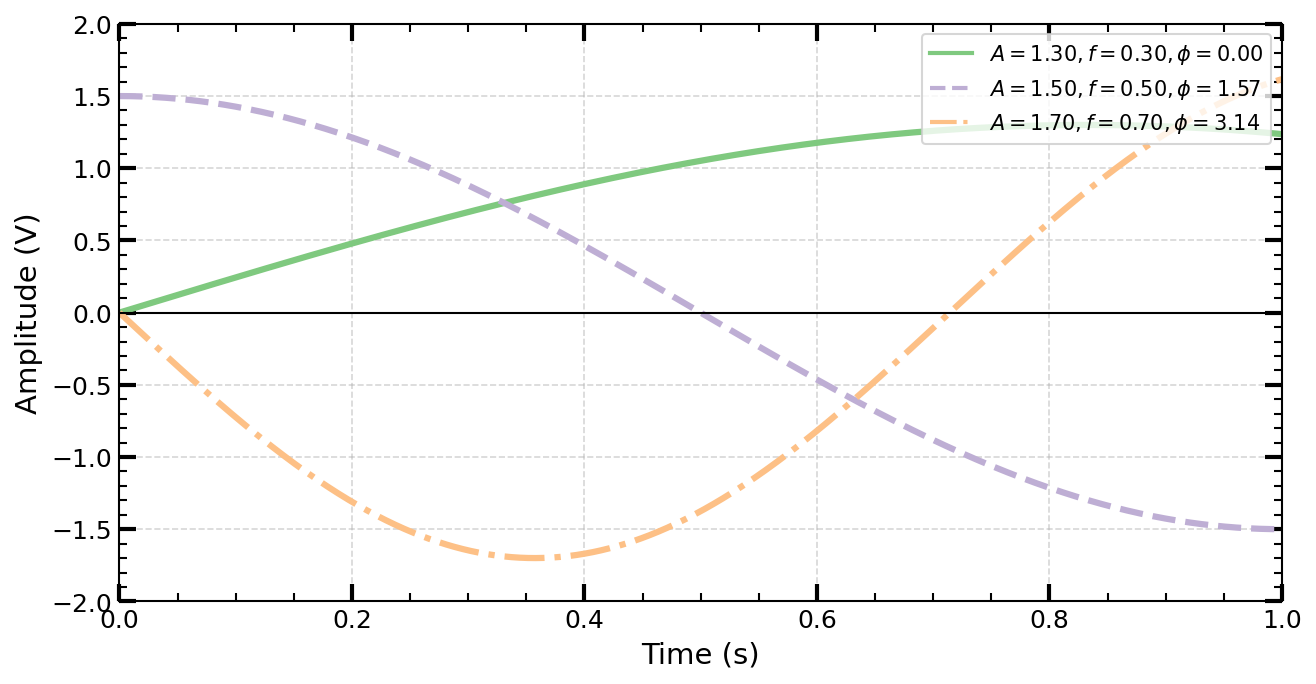

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# create own legend
from matplotlib.lines import Line2D


# Define the sinusoid function
def sinusoid_function(t, A, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi)

# Define parameters
A = np.array([1.3, 1.5, 1.7])
f = np.array([0.3, 0.5, 0.7])
phi = np.array([0, np.pi/2, np.pi])

# Time vector
t = np.linspace(0, 1, 1000)

# Generate colormap
colormap = cmaps.accent_3
colors = [colormap(i / (len(A) - 1)) for i in range(len(A))]
linestyles = ['-', '--', '-.']

# Create figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax.grid(linestyle='--', alpha=0.5)

# Plot the sinusoids
for i in range(len(A)):
    ax.plot(t, sinusoid_function(t, A[i], f[i], phi[i]), 
             label=rf'$A = {A[i]:.2f}, f = {f[i]:.2f}, \phi = {phi[i]:.2f}$', 
             color=colors[i], linestyle=linestyles[i])

# Add horizontal line at zero
ax.axhline(0, color='black', linewidth=1)

# Labels, legend, and ticks
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (V)")

my_legend = [Line2D([0], [0], color=colors[0], linestyle=linestyles[0], label=rf'$A = {A[0]:.2f}, f = {f[0]:.2f}, \phi = {phi[0]:.2f}$', linewidth=2),
             Line2D([0], [0], color=colors[1], linestyle=linestyles[1], label=rf'$A = {A[1]:.2f}, f = {f[1]:.2f}, \phi = {phi[1]:.2f}$', linewidth=2),
             Line2D([0], [0], color=colors[2], linestyle=linestyles[2], label=rf'$A = {A[2]:.2f}, f = {f[2]:.2f}, \phi = {phi[2]:.2f}$', linewidth=2)]
ax.legend(handles=my_legend, loc='upper right', fontsize=10)

ax.minorticks_on()
ax.tick_params(direction='in', which='both', top=True, right=True)
ax.set_xlim([0, 1])
ax.set_ylim([-2, 2])

plt.show()

## Harder Task

- Use your plot and make a zoom in area for the minimum of the third signal.
- Make sure that the zoom in area is easy to understand and ready for publication.

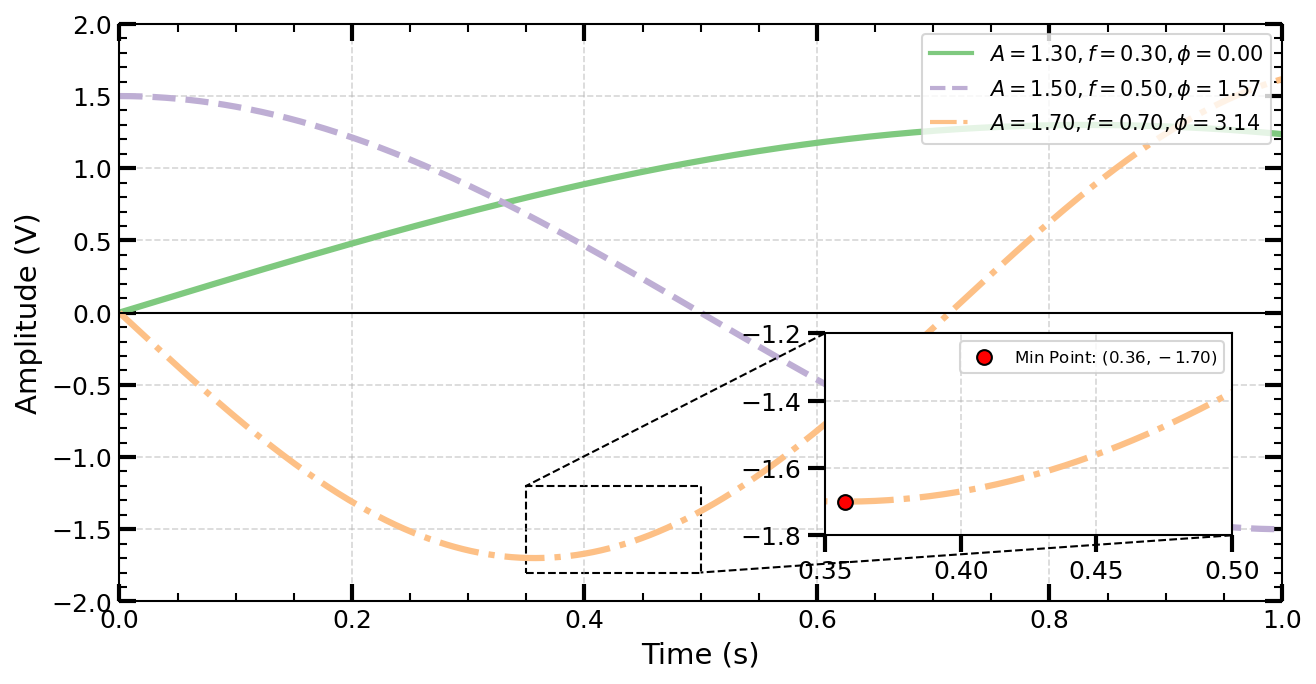

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# create own legend
from matplotlib.lines import Line2D


# Define the sinusoid function
def sinusoid_function(t, A, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi)

# Define parameters
A = np.array([1.3, 1.5, 1.7])
f = np.array([0.3, 0.5, 0.7])
phi = np.array([0, np.pi/2, np.pi])

# Time vector
t = np.linspace(0, 1, 1000)

# Generate colormap
colormap = cmaps.accent_3
colors = [colormap(i / (len(A) - 1)) for i in range(len(A))]
linestyles = ['-', '--', '-.']

# Create figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax.grid(linestyle='--', alpha=0.5)

# Plot the sinusoids
for i in range(len(A)):
    ax.plot(t, sinusoid_function(t, A[i], f[i], phi[i]), 
             label=rf'$A = {A[i]:.2f}, f = {f[i]:.2f}, \phi = {phi[i]:.2f}$', 
             color=colors[i], linestyle=linestyles[i])

# Add horizontal line at zero
ax.axhline(0, color='black', linewidth=1)

# Create inset for zoomed area
axins = inset_axes(ax, width="35%", height="35%", loc='lower left', bbox_to_anchor=(0.6, 0.1, 1, 1), bbox_transform=ax.transAxes)
axins.grid(linestyle='--', alpha=0.5)

# Focus on the third sinusoid
zoom_t = t
zoom_y = sinusoid_function(zoom_t, A[2], f[2], phi[2])
axins.plot(zoom_t, zoom_y, color=colors[2], linestyle=linestyles[2])

# Find and mark the minimum point
min_idx = np.argmin(zoom_y)
axins.scatter(zoom_t[min_idx], zoom_y[min_idx], color='red', edgecolor='black', zorder=3, s=50, label=r'Min Point: $({:.2f}, {:.2f})$'.format(zoom_t[min_idx], zoom_y[min_idx]))

# Define zoomed-in limits
axins.set_xlim(0.35, 0.5)
axins.set_ylim(-1.8, -1.2)
axins.legend(fontsize=8, loc='upper right')

# Draw lines connecting zoomed region
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", linestyle="dashed")

# Labels, legend, and ticks
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (V)")

my_legend = [Line2D([0], [0], color=colors[0], linestyle=linestyles[0], label=rf'$A = {A[0]:.2f}, f = {f[0]:.2f}, \phi = {phi[0]:.2f}$', linewidth=2),
             Line2D([0], [0], color=colors[1], linestyle=linestyles[1], label=rf'$A = {A[1]:.2f}, f = {f[1]:.2f}, \phi = {phi[1]:.2f}$', linewidth=2),
             Line2D([0], [0], color=colors[2], linestyle=linestyles[2], label=rf'$A = {A[2]:.2f}, f = {f[2]:.2f}, \phi = {phi[2]:.2f}$', linewidth=2)]
ax.legend(handles=my_legend, loc='upper right', fontsize=10)

ax.minorticks_on()
ax.tick_params(direction='in', which='both', top=True, right=True)
ax.set_xlim([0, 1])
ax.set_ylim([-2, 2])

plt.show()